In [1]:
from ThinFilmClasses import ThinFilmLayer, ThinFilmSystem
from DataProcessing import process_data, data_smoothing, plot_reflectance
from Optimization import residuals, optimize_nk
import numpy as np

# 1. Provide the path of the data, lower bound of the wavelength (left), and upper bound of the wavelength (right).
path = r'C:\Users\hongr\Box\MURI-SARA\Code\Sample_Refl_Scan\1.csv'
# path = r'test_data\spectra\+02_+05.csv'
left = 400
right = 800
data = process_data(path, left, right)

# 2. Create multilayer system
air = ThinFilmLayer("air", 1, 0, left, right)
layer1 = ThinFilmLayer("sio2", 88, 5, left, right)
substrate = ThinFilmLayer("c-Si", 1, 0, left, right)

print(layer1.get_N([400, 500, 600, 700, 800]))
multilayer = ThinFilmSystem([air, layer1, substrate])
R, _, _ = multilayer.calculate_RTA(data['wavelength'])
print(R)

# 3. Optimization (The most time-consuming step!)
optimal_data, _ = optimize_nk(multilayer, 1, data, smooth=False)

nk data found for air.
nk data found for sio2.
nk data found for c-Si.
[1.47002735+0.j 1.46233019+0.j 1.45803765+0.j 1.45532362+0.j
 1.45331598+0.j]


ValueError: operands could not be broadcast together with shapes (1195,1) (2,2,1195) 

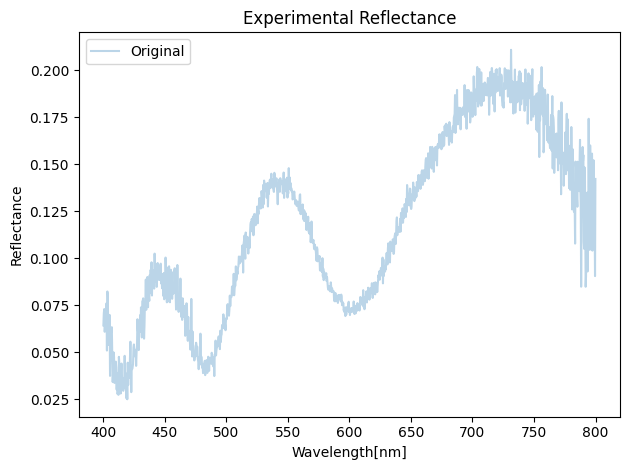

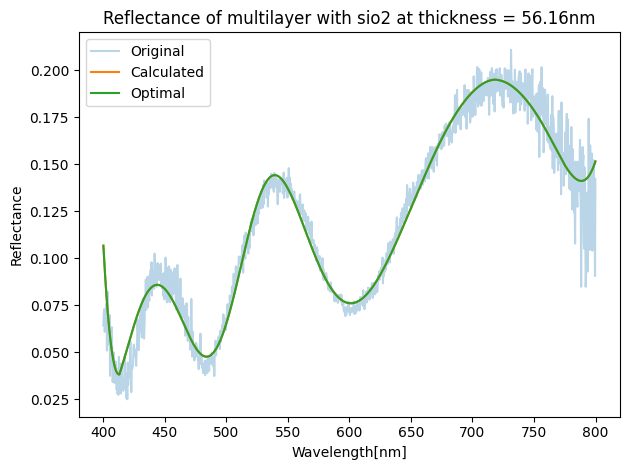

In [6]:
# 4. Plot the reflectance
plot_reflectance(data)
plot_reflectance(data, smooth=False, multilayer=multilayer, layer_index=1, optimal_data=optimal_data)